In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [143]:
df = pd.read_csv('IMDb_Movies_India.csv',encoding = 'latin1')

In [144]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning and Preprocessing

In [145]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [147]:
df.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [148]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [21]:
#Handle Missing Values

In [149]:
df.drop_duplicates(inplace=True)
print(f"Number of rows after removing duplicates: {df.shape[0]}")

Number of rows after removing duplicates: 15503


In [150]:
df.dropna(subset = ['Rating','Votes','Year'],inplace = True)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7919 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7919 non-null   object 
 1   Year      7919 non-null   object 
 2   Duration  5851 non-null   object 
 3   Genre     7817 non-null   object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   object 
 6   Director  7914 non-null   object 
 7   Actor 1   7794 non-null   object 
 8   Actor 2   7719 non-null   object 
 9   Actor 3   7627 non-null   object 
dtypes: float64(1), object(9)
memory usage: 680.5+ KB


In [152]:
df['Year'] = df['Year'].str.extract(r'(\d{4})').astype(int)

In [153]:
df['Duration'] = df['Duration'].str.replace(" min", "").astype(float)

In [183]:
df['Duration'] = df['Duration'].fillna(df['Duration'].median())

In [155]:
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)

In [158]:
#adding up features
df['Genre_Rating_avg'] = df.groupby('Genre')['Rating'].transform('mean')
df['Director_Rating_avg'] = df.groupby('Director')['Rating'].transform('mean')
df['Actor1_Rating_avg'] = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor2_Rating_avg'] = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor3_Rating_avg'] = df.groupby('Actor 3')['Rating'].transform('mean')

In [159]:
columns_to_fill = ['Genre_Rating_avg', 'Director_Rating_avg', 
                   'Actor1_Rating_avg', 'Actor2_Rating_avg', 'Actor3_Rating_avg']
for col in columns_to_fill:
    df[col].fillna(df['Rating'].mean(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_8024\269995863.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df['Rating'].mean(), inplace=True)


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7919 entries, 1 to 15508
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 7919 non-null   object 
 1   Year                 7919 non-null   int32  
 2   Duration             7919 non-null   float64
 3   Genre                7817 non-null   object 
 4   Rating               7919 non-null   float64
 5   Votes                7919 non-null   int32  
 6   Director             7914 non-null   object 
 7   Actor 1              7794 non-null   object 
 8   Actor 2              7719 non-null   object 
 9   Actor 3              7627 non-null   object 
 10  Genre_Rating_avg     7919 non-null   float64
 11  Director_Rating_avg  7919 non-null   float64
 12  Actor1_Rating_avg    7919 non-null   float64
 13  Actor2_Rating_avg    7919 non-null   float64
 14  Actor3_Rating_avg    7919 non-null   float64
dtypes: float64(7), int32(2), object(6)
memory 

## Exploratory Data Analysis (EDA)

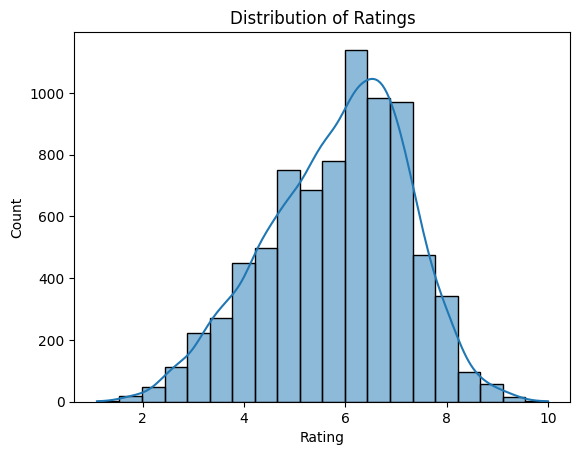

In [161]:
sns.histplot(df['Rating'], kde=True, bins=20)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.show()

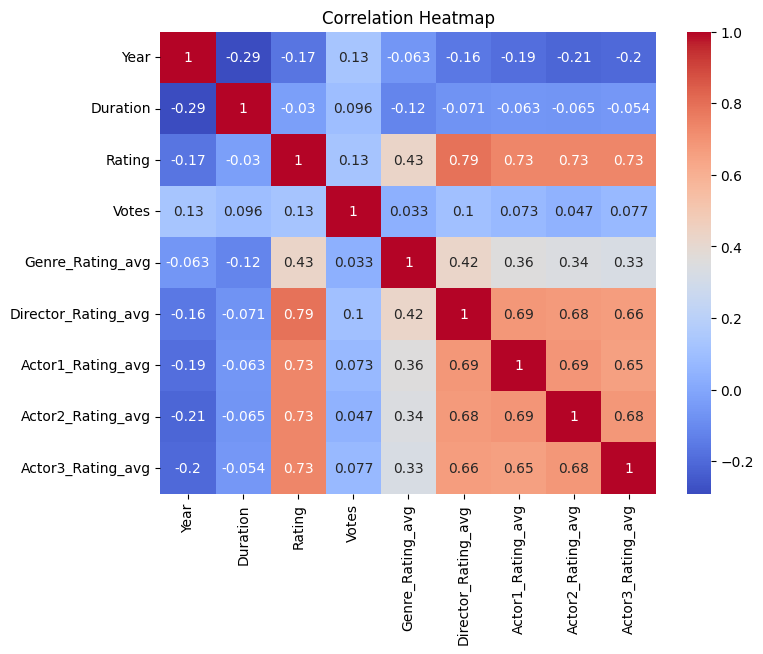

In [164]:
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

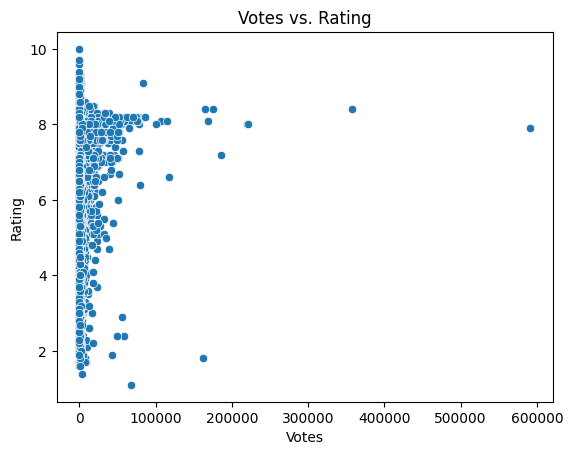

In [165]:
sns.scatterplot(x='Votes', y='Rating', data=df)
plt.title("Votes vs. Rating")
plt.show()

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


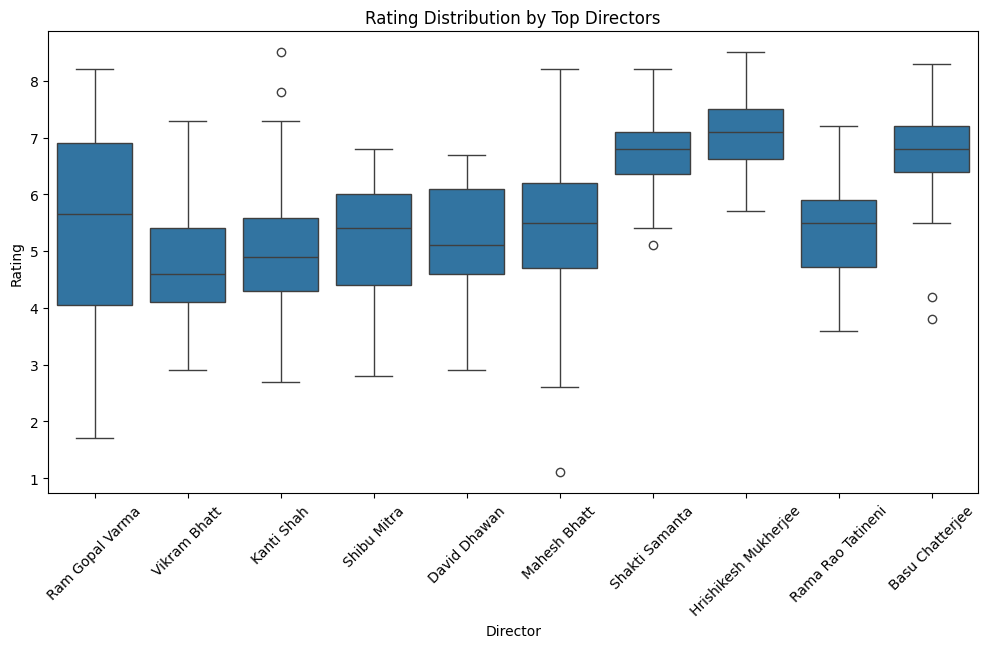

In [166]:
top_directors = df['Director'].value_counts().head(10).index
filtered_df = df[df['Director'].isin(top_directors)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='Director', y='Rating')
plt.title("Rating Distribution by Top Directors")
plt.xticks(rotation=45)
plt.show()


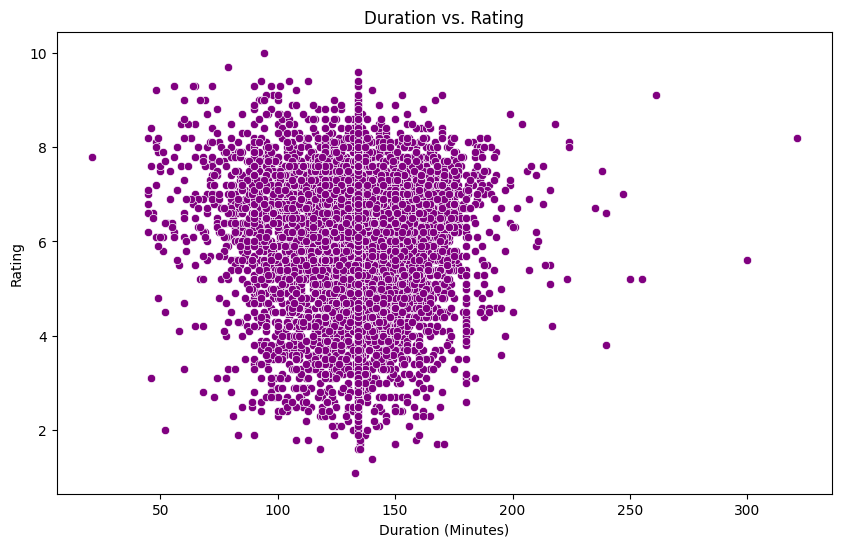

In [167]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration', y='Rating', data=df, color='purple')
plt.title("Duration vs. Rating")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Rating")
plt.show()

## Model Building and Training

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

x = df[['Year', 'Votes', 'Duration', 'Genre_Rating_avg', 'Director_Rating_avg', 'Actor1_Rating_avg', 'Actor2_Rating_avg', 'Actor3_Rating_avg']]
y = df['Rating']

In [188]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7919 entries, 1 to 15508
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 7919 non-null   object 
 1   Year                 7919 non-null   int32  
 2   Duration             7919 non-null   float64
 3   Genre                7919 non-null   int32  
 4   Rating               7919 non-null   float64
 5   Votes                7919 non-null   int32  
 6   Director             7919 non-null   int32  
 7   Actor 1              7919 non-null   int32  
 8   Actor 2              7919 non-null   int32  
 9   Actor 3              7919 non-null   int32  
 10  Genre_Rating_avg     7919 non-null   float64
 11  Director_Rating_avg  7919 non-null   float64
 12  Actor1_Rating_avg    7919 non-null   float64
 13  Actor2_Rating_avg    7919 non-null   float64
 14  Actor3_Rating_avg    7919 non-null   float64
dtypes: float64(7), int32(7), object(1)
memory 

MAE: Lower values are better.
RMSE: Again, lower values are better.
R-squared: Higher values (up to 1) are better. 

In [191]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

y_pred_lr = lr_model.predict(x_test)

lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_rmse = mean_squared_error(y_test, y_pred_lr, squared=False)
lr_r2 = r2_score(y_test, y_pred_lr)

print(f"Mean Absolute Error (MAE): {lr_mae}")
print(f"Root Mean Squared Error (RMSE): {lr_rmse}")
print(f"R-squared Score: {lr_r2}")


Mean Absolute Error (MAE): 0.49558363919770226
Root Mean Squared Error (RMSE): 0.6740030010624755
R-squared Score: 0.7556511132400238


In [192]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"R-squared Score: {r2_rf}")

Mean Absolute Error (MAE): 0.4083453282828283
Root Mean Squared Error (RMSE): 0.6110042977704326
R-squared Score: 0.7991946708555984


In [197]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor()
gb_model.fit(x_train, y_train)
y_pred_gb = gb_model.predict(x_test)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Mean Absolute Error (MAE): {mae_gb}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb}")
print(f"R-squared Score: {r2_gb}")

Mean Absolute Error (MAE): 0.44578244800053796
Root Mean Squared Error (RMSE): 0.622378724480776
R-squared Score: 0.7916487162737362


In [199]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(x_train, y_train)

y_pred_xgb = xgb_model.predict(x_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Mean Absolute Error (MAE): {mae_xgb}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb}")
print(f"R-squared Score: {r2_xgb}")

Mean Absolute Error (MAE): 0.4369088231463625
Root Mean Squared Error (RMSE): 0.6280206538325116
R-squared Score: 0.7878541416600191


In [201]:
## here, the random forest model outshines the most

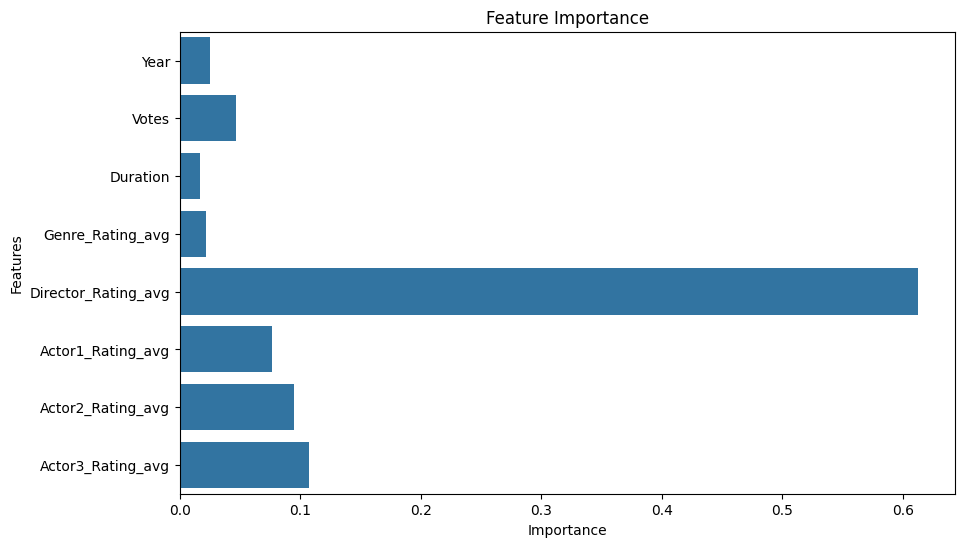

In [209]:
importances = rf_model.feature_importances_
features = x.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


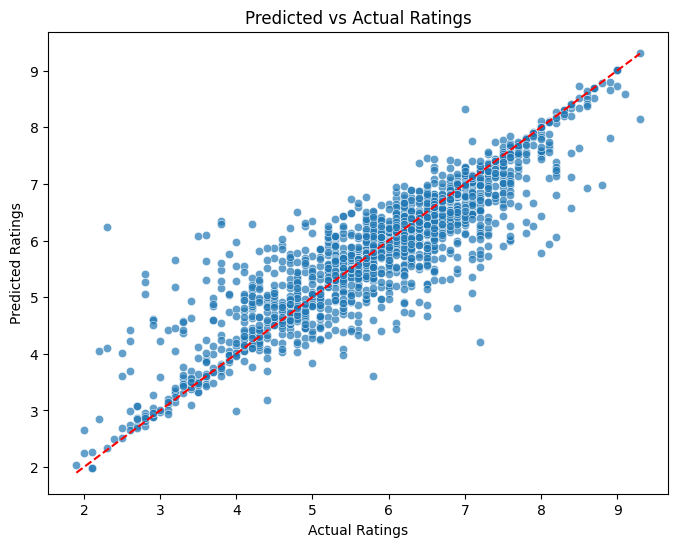

In [212]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Predicted vs Actual Ratings")
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.show()


In [213]:
import pickle

with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)